In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
# import csv
import numpy as np
# pylab.rcParams['figure.figsize'] = (13, 8)

In [75]:
import pandas as pd

exp_path = '/Users/xnimir/Desktop/'
file_name = 'counter_prop_WignerS'
d_params = pd.read_excel(exp_path + 'Cs_EA_new.xlsx'
                   ,sheet_name = 'Counter Feb 11_new') # need to fill in the excel sheet

df_s1 = pd.DataFrame(d_params,columns = ['Signal1'])
df_s2 = pd.DataFrame(d_params,columns = ['Signal2'])
df_s3 = pd.DataFrame(d_params,columns = ['Signal3'])

df_s1 = df_s1.to_numpy()
df_s2 = df_s2.to_numpy()
df_s3 = df_s3.to_numpy()

s1 = df_s1.flatten() # number of cycles for each data set
s1 = np.array(s1)
s2 = df_s2.flatten() # number of cycles for each data set
s2 = np.array(s2)
s3 = df_s3.flatten() # number of cycles for each data set
s3 = np.array(s3)

df_curr = pd.DataFrame(d_params,columns = ['Ion current1 (pA)'])
df_curr = df_curr.to_numpy()
i_s = df_curr.flatten() # number of cycles for each data set
i_s = np.array(i_s)
df_rpow = pd.DataFrame(d_params,columns = ['Laser power red (mW)'])
df_rpow = df_rpow.to_numpy()
p_r = df_rpow.flatten() # number of cycles for each data set
p_r = np.array(p_r)
df_gpow = pd.DataFrame(d_params,columns = ['Laser power green (mW)'])
df_gpow = df_gpow.to_numpy()
p_g = df_gpow.flatten() # number of cycles for each data set
p_g = np.array(p_g)
df_avg = pd.DataFrame(d_params,columns = ['AverageSignal'])
df_avg = df_avg.to_numpy()
avgs = df_avg.flatten() # number of cycles for each data set
avgs_n = np.array(avgs)/(i_s*p_r*p_g)

df_wl = pd.DataFrame(d_params,columns = [' WL red (nm)'])
df_wl = df_wl.to_numpy()
wls = df_wl.flatten() # number of cycles for each data set
wls = np.array(wls)

h=6.62607015e-34
hc = 1239.84193 #eV/nm
j_eV = 6.2415093e18
c =299792458
ens = hc/wls #x axis
omegas = 2*np.pi*(c/wls)
cross_section = avgs_n*omegas
cross_section = cross_section/max(cross_section)

avg_3 = []
devs_3 = []
for i in range(len(s1)):
    l0 = np.array([s1[i],s2[i],s3[i]])
    avg_3.append(np.sum(l0))
    devs_3.append(np.sqrt(np.sum(l0)))

avg_3 = np.array(avg_3)
avg_3n = (avg_3)/(i_s*p_r)
devs_3 = np.array(devs_3)
devs_3n = devs_3/(i_s*p_r)

x1 = ens[:]
y1 = avg_3n[:]
err_y = devs_3n[:]
# print (type(avg_3))

1.9256321035173756 5.06525508519399e-07
0.4716114 eV


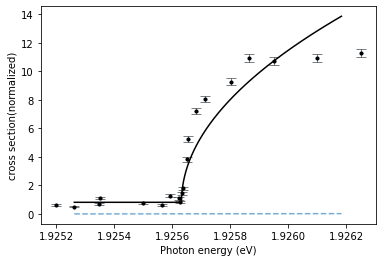

In [80]:
from scipy.optimize import curve_fit

def Wigner(x,a,b,ea):
    return a + b*np.sqrt(x-ea+np.abs(x-ea))

a=0
b=1
ea=1.92564
setColor1='black'
setColor2=[1,0,0]
pars = [a,b,ea]
xarray=np.arange(x1[0],x1[len(x1)-1]+0.0005,0.0000001)
y_func = Wigner(xarray,*pars)
# bound_par = ([0,0,ea-0.01],[1,200,ea+0.01])
pl0, covl0 = curve_fit(Wigner, x1, y1,[*pars],sigma = err_y, absolute_sigma=True)
#pl2, covl2 = curve_fit(Wigner, x1, y1,[a,b,ea],bounds=bound_par)
plt.errorbar(x1, y1, yerr=err_y, fmt='.k',color='blue', capthick=0.5,capsize=5,elinewidth=0.5)
plt.plot(xarray,Wigner(xarray, *pl0),label='fit',color=setColor1)
plt.plot(xarray,y_func, linestyle = '--',alpha = 0.6)
plt.scatter(x1,y1,s=7)
#plt.plot(xarray,Wigner(xarray, *pl2),label='fit',color=setColor2)
plt.xlabel("Photon energy (eV)")
plt.ylabel("cross section(normalized)") 
print (pl0[2],np.sqrt(np.diag(covl0))[2])
#print(setColor1,'Wigner fitted curve: ' ,pl0, "with error: ",np.sqrt(np.diag(covl0)))
middle_trans = 1.454620680 #energy difference between 6p and Rydberg state
Doppler = 600*1e-6 #eV
electron_affinity = abs(pl0[2]-middle_trans + Doppler)
print (round(electron_affinity,7), 'eV')
#plt.text(x1[0], y1[-1], 'eA: ' + str(round(electron_affinity,7)) +'(13) eV', bbox=dict(facecolor='red', alpha=0.5))
plt.savefig(exp_path + file_name + '.png', dpi = 300, bbox_inches='tight')
plt.show()

In [64]:
print(len(x1))

20


In [77]:
print(err_y)

[0.05240324 0.06450151 0.2679704  0.2142727  0.18069788 0.08647581
 0.07330762 0.10061765 0.10420873 0.14971491 0.26109462 0.26140971
 0.27513772 0.24162809 0.0654339  0.06320161 0.06104892 0.07813832
 0.08932258 0.20417186]
